In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_n_bit_numbers(n):
  return [list(map(int, bin(i)[2:].zfill(n))) for i in range(2 ** n)]

def xor_function(x):
  y = [int(np.bitwise_xor.reduce(seq)) for seq in x]

  return y

def palindrome_function(x):
  y = [int(seq == seq[::-1]) for seq in x]

  return y

def even_parity_function(x):
  y = [int(sum(seq) % 2 == 0) for seq in x]

  return y

def majority_function(x):
  y = [int(sum(seq) > len(seq) // 2) for seq in x]

  return y

In [7]:
x_2_list = generate_n_bit_numbers(2)
x_4_list = generate_n_bit_numbers(4)
x_5_list = generate_n_bit_numbers(5)

print(f"x_2: {x_2_list}")
print(f"x_4: {x_4_list}")
print(f"x_5: {x_5_list}")

x_2 = np.array(x_2_list)
x_4 = np.array(x_4_list)
x_5 = np.array(x_5_list)

print(f"x_2: {x_2}")
print(f"x_4: {x_4}")
print(f"x_5: {x_5}")

x_2_xor_y = np.array(xor_function(x_2_list))

x_4_palindrome_y = np.array(palindrome_function(x_4_list))
x_5_palindrome_y = np.array(palindrome_function(x_5_list))

x_4_even_parity_y = np.array(even_parity_function(x_4_list))
x_5_even_parity_y = np.array(even_parity_function(x_5_list))

x_4_majority_y = np.array(majority_function(x_4_list))
x_5_majority_y = np.array(majority_function(x_5_list))

print(f"x_2_xor_y: {x_2_xor_y}")
print(f"x_4_palindrome_y: {x_4_palindrome_y}")
print(f"x_5_palindrome_y: {x_5_palindrome_y}")
print(f"x_4_even_parity_y: {x_4_even_parity_y}")
print(f"x_5_even_parity_y: {x_5_even_parity_y}")

x_2: [[0, 0], [0, 1], [1, 0], [1, 1]]
x_4: [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]
x_5: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]]
x_2: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
x_4: [[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]


In [21]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
  return a * (1 - a)

def relu(x):
  return np.maximum(0, x)

def relu_derivative(a):
  return np.where(a > 0, 1, 0)

def mse(y, y_hat):
  assert(y.shape == y_hat.shape)

  return np.mean((y - y_hat) ** 2)

def bce(y, y_hat):
  assert(y.shape == y_hat.shape)

  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [22]:
class SigmoidNN:
  def __init__(self, arch, x, y, lr=0.1, epochs=10000, loss_func="bce"):
    self.arch = arch
    self.x = x
    self.no_of_samples = x.shape[0]
    self.y = y

    if len(y.shape) == 1:
      self.y = y.reshape(-1, 1)
      y = self.y

    assert(x.shape[0] == y.shape[0])
    assert(x.shape[1] == arch[0])
    assert(arch[-1] == y.shape[1])

    self.lr = lr
    self.epochs = epochs
    self.loss_func = loss_func
    self.losses = []

    self.w = [np.random.rand(arch[i], arch[i + 1]) for i in range(len(arch) - 1)]
    self.b = [np.random.rand(1, arch[i + 1]) for i in range(len(arch) - 1)]

  def forward(self):
    self.z = []
    self.a = [self.x]
    for i in range(len(self.arch)-1):
      self.z.append(np.dot(self.a[i], self.w[i]) + self.b[i])
      self.a.append(sigmoid(self.z[i]))

    return self.a[-1]

  def backward(self):
    y = self.y

    if self.loss_func == "bce":
      self.dz = [(self.a[-1] - y) / self.no_of_samples]
    elif self.loss_func == "mse":
      self.dz = [2*(self.a[-1] - y) * sigmoid_derivative(self.a[-1]) / self.no_of_samples]

    else:
      raise ValueError("Invalid loss function")

    for i in range(len(self.arch) - 2, -1, -1):
      self.dw = np.dot(self.a[i].T, self.dz[-1])
      assert(self.dw.shape == self.w[i].shape)

      self.db = np.sum(self.dz[-1], axis=0, keepdims=True)
      assert(self.db.shape == self.b[i].shape)

      dz_temp = np.dot(self.dz[-1], self.w[i].T) * sigmoid_derivative(self.a[i])
      assert(dz_temp.shape == self.a[i].shape)

      self.dz.append(dz_temp)
      self.w[i] -= self.lr * self.dw
      self.b[i] -= self.lr * self.db

  def train(self, print_epoch=1000):
    for _ in range(self.epochs):
      y_hat = self.forward()
      self.backward()

      if self.loss_func == "bce":
        self.losses.append(bce(self.y, y_hat))
      elif self.loss_func == "mse":
        self.losses.append(mse(self.y, y_hat))

      if _ % print_epoch == 0:
        print(f"Epoch {_}: Loss = {self.losses[-1]}, Accuracy = {self.accuracy(y_hat)}")

  def predict(self, y_hat):
    return (y_hat > 0.5).astype(int)

  def plot_loss(self):
    plt.plot(self.losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epoch")

    plt.show()

  def accuracy(self, y_hat):
    assert(y_hat.shape == self.y.shape)
    y_pred = self.predict(y_hat)
    assert(y_pred.shape == self.y.shape)

    return np.mean(self.y == y_pred)

  def print_weights_and_biases(self):
    for i in range(len(self.w)):
      print(f"Layer {i + 1}")
      print(f"w = {self.w[i]}")
      print(f"b = {self.b[i]}")

Epoch 0: Loss = 0.31606392944425754, Accuracy = 0.5
Epoch 10: Loss = 0.3053566575907492, Accuracy = 0.5
Epoch 20: Loss = 0.29518643499841457, Accuracy = 0.5
Epoch 30: Loss = 0.28590087222923255, Accuracy = 0.5
Epoch 40: Loss = 0.27777890096616376, Accuracy = 0.5
Epoch 50: Loss = 0.27097814042879376, Accuracy = 0.5
Epoch 60: Loss = 0.26551593711926946, Accuracy = 0.5
Epoch 70: Loss = 0.2612895599235314, Accuracy = 0.5
Epoch 80: Loss = 0.2581210777316236, Accuracy = 0.5
Epoch 90: Loss = 0.2558052067501688, Accuracy = 0.5


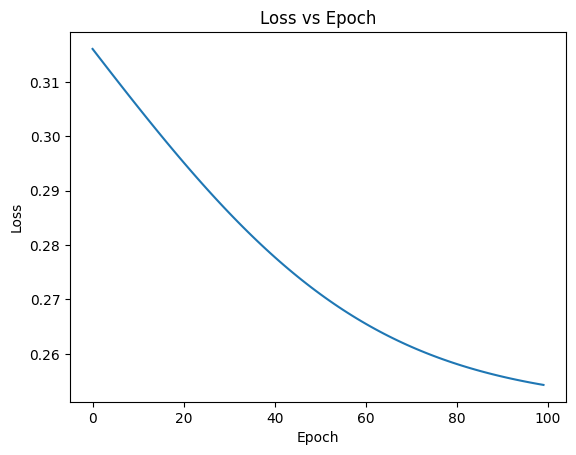

Layer 1
w = [[ 0.2130033]
 [-0.0534578]]
b = [[0.15286197]]


In [23]:
nn_xor_mse = SigmoidNN([2,1], x_2, x_2_xor_y, 0.1, 100, loss_func="mse")
nn_xor_mse.train(print_epoch=10)
nn_xor_mse.plot_loss()
nn_xor_mse.print_weights_and_biases()

Epoch 0: Loss = 0.7755559193518078, Accuracy = 0.5
Epoch 10: Loss = 0.7336092946266073, Accuracy = 0.5
Epoch 20: Loss = 0.7131627892654253, Accuracy = 0.5
Epoch 30: Loss = 0.7035154372071218, Accuracy = 0.5
Epoch 40: Loss = 0.6989812140771001, Accuracy = 0.25
Epoch 50: Loss = 0.6968049085149846, Accuracy = 0.25
Epoch 60: Loss = 0.6957084172612096, Accuracy = 0.25
Epoch 70: Loss = 0.6951101089850684, Accuracy = 0.25
Epoch 80: Loss = 0.6947470281744856, Accuracy = 0.25
Epoch 90: Loss = 0.6945001090104606, Accuracy = 0.25
Epoch 100: Loss = 0.6943149173864246, Accuracy = 0.25
Epoch 110: Loss = 0.6941660333200865, Accuracy = 0.25
Epoch 120: Loss = 0.6940411069266123, Accuracy = 0.25
Epoch 130: Loss = 0.6939337294424787, Accuracy = 0.25
Epoch 140: Loss = 0.6938402427844713, Accuracy = 0.5
Epoch 150: Loss = 0.6937583067484386, Accuracy = 0.5
Epoch 160: Loss = 0.6936862505224525, Accuracy = 0.5
Epoch 170: Loss = 0.6936227745779189, Accuracy = 0.5
Epoch 180: Loss = 0.6935668095593168, Accuracy 

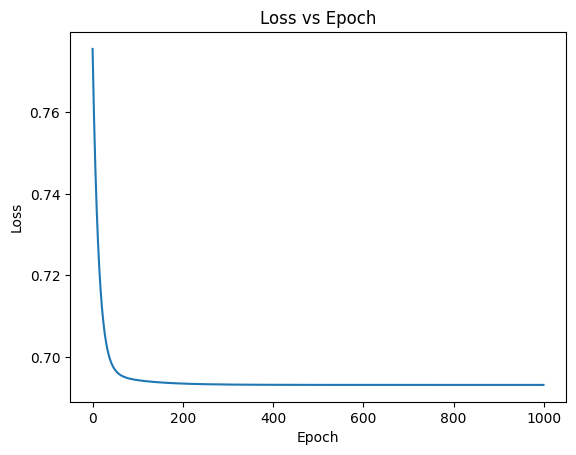

Layer 1
w = [[-0.00067772]
 [ 0.00027964]]
b = [[0.00023609]]


In [24]:
nn_xor_bce = SigmoidNN([2,1], x_2, x_2_xor_y, 0.1, 1000, loss_func="bce")
nn_xor_bce.train(print_epoch=10)
nn_xor_bce.plot_loss()
nn_xor_bce.print_weights_and_biases()

Epoch 0: Loss = 0.5719650808556485, Accuracy = 0.25
Epoch 10: Loss = 0.5336525270567329, Accuracy = 0.25
Epoch 20: Loss = 0.48355643302024515, Accuracy = 0.25
Epoch 30: Loss = 0.4221842349533952, Accuracy = 0.25
Epoch 40: Loss = 0.3569047715474094, Accuracy = 0.25
Epoch 50: Loss = 0.3004414928564412, Accuracy = 0.375
Epoch 60: Loss = 0.2603950507533902, Accuracy = 0.5625
Epoch 70: Loss = 0.23514195402959914, Accuracy = 0.4375
Epoch 80: Loss = 0.21974718493331358, Accuracy = 0.625
Epoch 90: Loss = 0.21023708069279734, Accuracy = 0.75
Epoch 100: Loss = 0.20417815096761377, Accuracy = 0.75
Epoch 110: Loss = 0.20018308057724366, Accuracy = 0.75
Epoch 120: Loss = 0.19746143390850665, Accuracy = 0.75
Epoch 130: Loss = 0.19555172911696123, Accuracy = 0.75
Epoch 140: Loss = 0.19417587576610212, Accuracy = 0.75
Epoch 150: Loss = 0.19316084091160796, Accuracy = 0.75
Epoch 160: Loss = 0.19239569337753196, Accuracy = 0.75
Epoch 170: Loss = 0.19180737037572207, Accuracy = 0.75
Epoch 180: Loss = 0.1

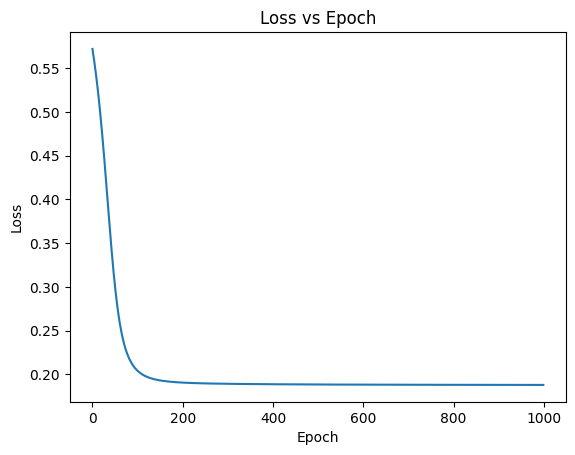

Layer 1
w = [[-0.22822762]
 [-0.15688514]
 [-0.17795257]
 [-0.27443432]]
b = [[-0.70142654]]


In [25]:
nn_pal_4_mse = SigmoidNN([4,1], x_4, x_4_palindrome_y, 0.1, 1000, loss_func="mse")
nn_pal_4_mse.train(print_epoch=10)
nn_pal_4_mse.plot_loss()
nn_pal_4_mse.print_weights_and_biases()

Epoch 0: Loss = 1.5300321150772507, Accuracy = 0.25
Epoch 10: Loss = 0.9600192908486693, Accuracy = 0.25
Epoch 20: Loss = 0.7151298191221164, Accuracy = 0.5625
Epoch 30: Loss = 0.628482491658212, Accuracy = 0.625
Epoch 40: Loss = 0.5968605354770862, Accuracy = 0.75
Epoch 50: Loss = 0.5841753958060902, Accuracy = 0.75
Epoch 60: Loss = 0.5785306962142132, Accuracy = 0.75
Epoch 70: Loss = 0.5757073385739009, Accuracy = 0.75
Epoch 80: Loss = 0.5740877026806999, Accuracy = 0.75
Epoch 90: Loss = 0.5730129327604576, Accuracy = 0.75
Epoch 100: Loss = 0.57220238654314, Accuracy = 0.75
Epoch 110: Loss = 0.5715322220027876, Accuracy = 0.75
Epoch 120: Loss = 0.5709459355192096, Accuracy = 0.75
Epoch 130: Loss = 0.5704166827706967, Accuracy = 0.75
Epoch 140: Loss = 0.5699309421390885, Accuracy = 0.75
Epoch 150: Loss = 0.5694812887447395, Accuracy = 0.75
Epoch 160: Loss = 0.5690631535948031, Accuracy = 0.75
Epoch 170: Loss = 0.5686733548364065, Accuracy = 0.75
Epoch 180: Loss = 0.5683094256262122, A

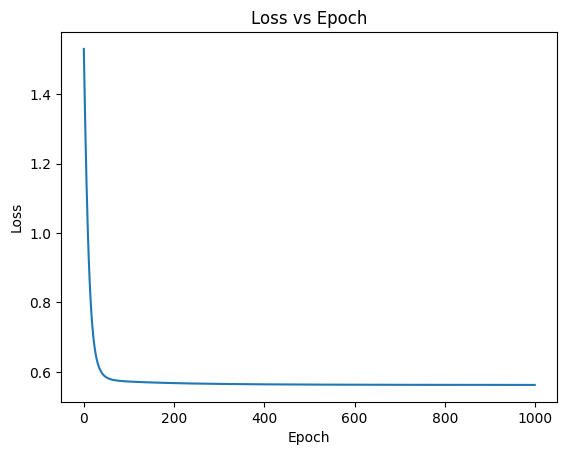

Layer 1
w = [[-0.02935311]
 [-0.03253162]
 [-0.03481723]
 [-0.03623014]]
b = [[-1.02361141]]


In [26]:
nn_pal_4_bce = SigmoidNN([4,1], x_4, x_4_palindrome_y, 0.1, 1000, loss_func="bce")
nn_pal_4_bce.train(print_epoch=10)
nn_pal_4_bce.plot_loss()
nn_pal_4_bce.print_weights_and_biases()

Epoch 0: Loss = 0.560883357462075, Accuracy = 0.25
Epoch 10: Loss = 0.5134411734238812, Accuracy = 0.25
Epoch 20: Loss = 0.45023992538866364, Accuracy = 0.25
Epoch 30: Loss = 0.37574110809131805, Accuracy = 0.25
Epoch 40: Loss = 0.3064976180995892, Accuracy = 0.3125
Epoch 50: Loss = 0.257771771227673, Accuracy = 0.46875
Epoch 60: Loss = 0.22924662168918392, Accuracy = 0.5625
Epoch 70: Loss = 0.21343104483458025, Accuracy = 0.75
Epoch 80: Loss = 0.20449282316641787, Accuracy = 0.75
Epoch 90: Loss = 0.19922075329789435, Accuracy = 0.75
Epoch 100: Loss = 0.19596862659796688, Accuracy = 0.75
Epoch 110: Loss = 0.1938798431932821, Accuracy = 0.75
Epoch 120: Loss = 0.19249046965537459, Accuracy = 0.75
Epoch 130: Loss = 0.19153789733281254, Accuracy = 0.75
Epoch 140: Loss = 0.19086719582247294, Accuracy = 0.75
Epoch 150: Loss = 0.19038354262105045, Accuracy = 0.75
Epoch 160: Loss = 0.19002702186454423, Accuracy = 0.75
Epoch 170: Loss = 0.18975871799600597, Accuracy = 0.75
Epoch 180: Loss = 0.1

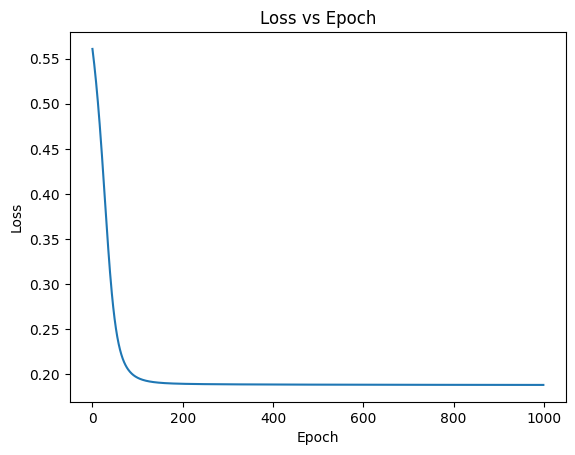

Layer 1
w = [[-0.23635488]
 [-0.18369161]
 [-0.04880999]
 [-0.19379007]
 [-0.20621133]]
b = [[-0.6822055]]


In [27]:
nn_pal_5_mse = SigmoidNN([5,1], x_5, x_5_palindrome_y, 0.1, 1000, loss_func="mse")
nn_pal_5_mse.train(print_epoch=10)
nn_pal_5_mse.plot_loss()
nn_pal_5_mse.print_weights_and_biases()

Epoch 0: Loss = 1.1382308653180082, Accuracy = 0.25
Epoch 10: Loss = 0.7496273458325432, Accuracy = 0.28125
Epoch 20: Loss = 0.6250035931553735, Accuracy = 0.78125
Epoch 30: Loss = 0.5868872444049966, Accuracy = 0.75
Epoch 40: Loss = 0.5741072085722112, Accuracy = 0.75
Epoch 50: Loss = 0.5693762487644876, Accuracy = 0.75
Epoch 60: Loss = 0.5674385219690268, Accuracy = 0.75
Epoch 70: Loss = 0.5665373789911029, Accuracy = 0.75
Epoch 80: Loss = 0.5660426423410532, Accuracy = 0.75
Epoch 90: Loss = 0.5657169613517625, Accuracy = 0.75
Epoch 100: Loss = 0.5654677554197456, Accuracy = 0.75
Epoch 110: Loss = 0.565257798808358, Accuracy = 0.75
Epoch 120: Loss = 0.5650715634639845, Accuracy = 0.75
Epoch 130: Loss = 0.5649021834685309, Accuracy = 0.75
Epoch 140: Loss = 0.5647463114946691, Accuracy = 0.75
Epoch 150: Loss = 0.5646020638212697, Accuracy = 0.75
Epoch 160: Loss = 0.5644681914880891, Accuracy = 0.75
Epoch 170: Loss = 0.5643437426526878, Accuracy = 0.75
Epoch 180: Loss = 0.56422792289278

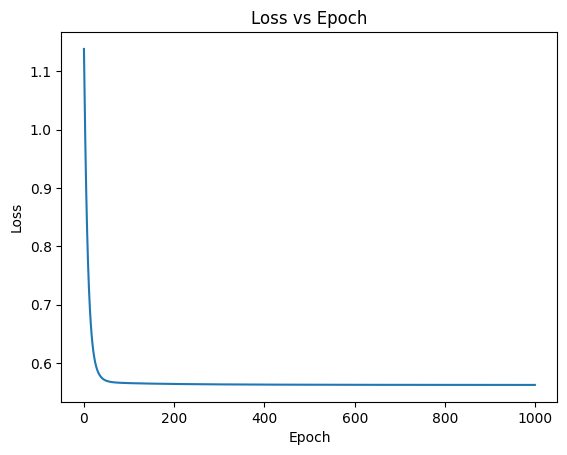

Layer 1
w = [[-0.01863944]
 [-0.0216043 ]
 [-0.01838325]
 [-0.0213043 ]
 [-0.01805748]]
b = [[-1.04403282]]


In [28]:
nn_pal_5_bce = SigmoidNN([5,1], x_5, x_5_palindrome_y, 0.1, 1000, loss_func="bce")
nn_pal_5_bce.train(print_epoch=10)
nn_pal_5_bce.plot_loss()
nn_pal_5_bce.print_weights_and_biases()

Epoch 0: Loss = 0.33173395507378056, Accuracy = 0.5
Epoch 10: Loss = 0.31773488025130125, Accuracy = 0.5
Epoch 20: Loss = 0.30413927457663137, Accuracy = 0.5
Epoch 30: Loss = 0.29170183814419837, Accuracy = 0.5
Epoch 40: Loss = 0.28106725819690603, Accuracy = 0.4375
Epoch 50: Loss = 0.27258243073942057, Accuracy = 0.4375
Epoch 60: Loss = 0.266231977207444, Accuracy = 0.5625
Epoch 70: Loss = 0.26172432104369103, Accuracy = 0.5
Epoch 80: Loss = 0.25864724552731444, Accuracy = 0.5
Epoch 90: Loss = 0.2565973022585682, Accuracy = 0.5
Epoch 100: Loss = 0.2552453436599442, Accuracy = 0.5
Epoch 110: Loss = 0.25435043281920017, Accuracy = 0.5
Epoch 120: Loss = 0.2537478344348457, Accuracy = 0.5
Epoch 130: Loss = 0.25332973258888647, Accuracy = 0.5
Epoch 140: Loss = 0.2530275238924415, Accuracy = 0.5
Epoch 150: Loss = 0.2527983370273625, Accuracy = 0.5
Epoch 160: Loss = 0.25261568038955456, Accuracy = 0.5
Epoch 170: Loss = 0.25246328669267637, Accuracy = 0.5
Epoch 180: Loss = 0.25233118923170916

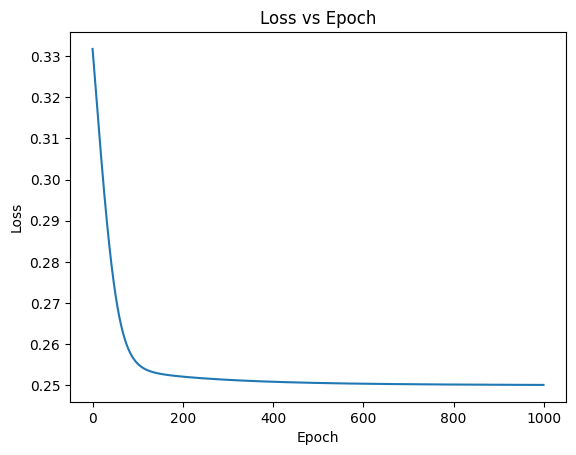

Layer 1
w = [[0.04175398]
 [0.05328029]
 [0.02645593]
 [0.02608451]]
b = [[-0.08358767]]


In [29]:
nn_even_4 = SigmoidNN([4,1], x_4, x_4_even_parity_y, 0.1, 1000, loss_func="mse")
nn_even_4.train(print_epoch=10)
nn_even_4.plot_loss()
nn_even_4.print_weights_and_biases()

Epoch 0: Loss = 0.38240908714237914, Accuracy = 0.5
Epoch 10: Loss = 0.37188156106594905, Accuracy = 0.5
Epoch 20: Loss = 0.36020111242604524, Accuracy = 0.5
Epoch 30: Loss = 0.34744392053446566, Accuracy = 0.46875
Epoch 40: Loss = 0.33385321226054265, Accuracy = 0.46875
Epoch 50: Loss = 0.319894415918457, Accuracy = 0.46875
Epoch 60: Loss = 0.3062557576057565, Accuracy = 0.5
Epoch 70: Loss = 0.29374095475667344, Accuracy = 0.53125
Epoch 80: Loss = 0.2830546190744237, Accuracy = 0.53125
Epoch 90: Loss = 0.2745836361459083, Accuracy = 0.53125
Epoch 100: Loss = 0.26831584813314446, Accuracy = 0.53125
Epoch 110: Loss = 0.2639344665829281, Accuracy = 0.5
Epoch 120: Loss = 0.26099427830718486, Accuracy = 0.5
Epoch 130: Loss = 0.2590664807459328, Accuracy = 0.5
Epoch 140: Loss = 0.25780884362653594, Accuracy = 0.5
Epoch 150: Loss = 0.256977329094927, Accuracy = 0.5
Epoch 160: Loss = 0.25640991094542886, Accuracy = 0.46875
Epoch 170: Loss = 0.25600387293968874, Accuracy = 0.4375
Epoch 180: Lo

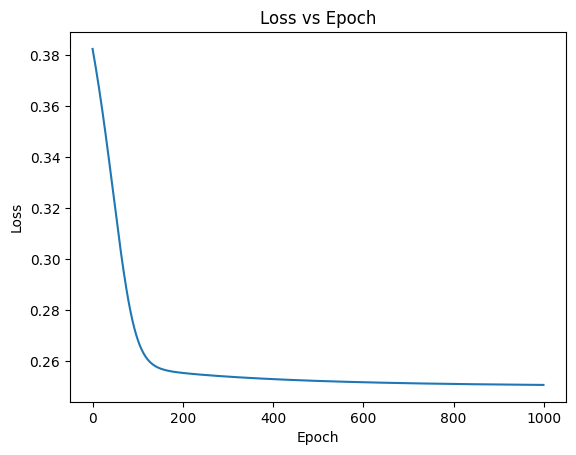

Layer 1
w = [[0.06576503]
 [0.08743941]
 [0.09576703]
 [0.08033813]
 [0.06984555]]
b = [[-0.22285538]]


In [30]:
nn_even_5 = SigmoidNN([5,1], x_5, x_5_even_parity_y, 0.1, 1000, loss_func="mse")
nn_even_5.train(print_epoch=10)
nn_even_5.plot_loss()
nn_even_5.print_weights_and_biases()

Epoch 0: Loss = 0.38270054698883915, Accuracy = 0.3125
Epoch 10: Loss = 0.33611877972812065, Accuracy = 0.375
Epoch 20: Loss = 0.28973019545549666, Accuracy = 0.375
Epoch 30: Loss = 0.2492673042725566, Accuracy = 0.5
Epoch 40: Loss = 0.21856652698203582, Accuracy = 0.5625
Epoch 50: Loss = 0.19771123201910556, Accuracy = 0.6875
Epoch 60: Loss = 0.1843309438154061, Accuracy = 0.8125
Epoch 70: Loss = 0.17574645109868017, Accuracy = 0.9375
Epoch 80: Loss = 0.16998003195885225, Accuracy = 0.9375
Epoch 90: Loss = 0.16581200032909732, Accuracy = 0.9375
Epoch 100: Loss = 0.1625482967453387, Accuracy = 0.8125
Epoch 110: Loss = 0.15980663059605935, Accuracy = 0.875
Epoch 120: Loss = 0.15737836645661202, Accuracy = 0.875
Epoch 130: Loss = 0.15514936308092014, Accuracy = 0.875
Epoch 140: Loss = 0.1530565889801438, Accuracy = 0.875
Epoch 150: Loss = 0.1510646883058605, Accuracy = 0.875
Epoch 160: Loss = 0.14915334790579626, Accuracy = 0.875
Epoch 170: Loss = 0.14731046942245757, Accuracy = 0.875
Ep

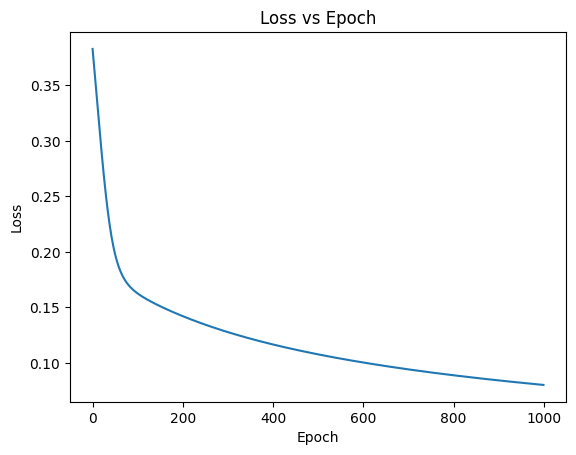

Layer 1
w = [[1.24750983]
 [1.23332651]
 [1.22968734]
 [1.24880915]]
b = [[-3.19851135]]


In [31]:
nn_majority_4_mse = SigmoidNN([4,1], x_4, x_4_majority_y, 0.1, 1000, loss_func="mse")
nn_majority_4_mse.train(print_epoch=10)
nn_majority_4_mse.plot_loss()
nn_majority_4_mse.print_weights_and_biases()

Epoch 0: Loss = 0.9401235725469473, Accuracy = 0.3125
Epoch 10: Loss = 0.7264926960384834, Accuracy = 0.4375
Epoch 20: Loss = 0.6312930729707065, Accuracy = 0.625
Epoch 30: Loss = 0.5885494018850655, Accuracy = 0.875
Epoch 40: Loss = 0.5652768721813487, Accuracy = 0.875
Epoch 50: Loss = 0.54910923655027, Accuracy = 0.8125
Epoch 60: Loss = 0.5357754847706212, Accuracy = 0.8125
Epoch 70: Loss = 0.5238036460000401, Accuracy = 0.8125
Epoch 80: Loss = 0.5126674510697781, Accuracy = 0.8125
Epoch 90: Loss = 0.5021622242851498, Accuracy = 0.8125
Epoch 100: Loss = 0.49219457498914276, Accuracy = 0.8125
Epoch 110: Loss = 0.48271092202118676, Accuracy = 0.8125
Epoch 120: Loss = 0.4736729680884856, Accuracy = 0.8125
Epoch 130: Loss = 0.46504917625788034, Accuracy = 0.875
Epoch 140: Loss = 0.456811732122811, Accuracy = 0.9375
Epoch 150: Loss = 0.44893539522821907, Accuracy = 0.9375
Epoch 160: Loss = 0.4413970053201419, Accuracy = 0.9375
Epoch 170: Loss = 0.4341752191632791, Accuracy = 1.0
Epoch 180

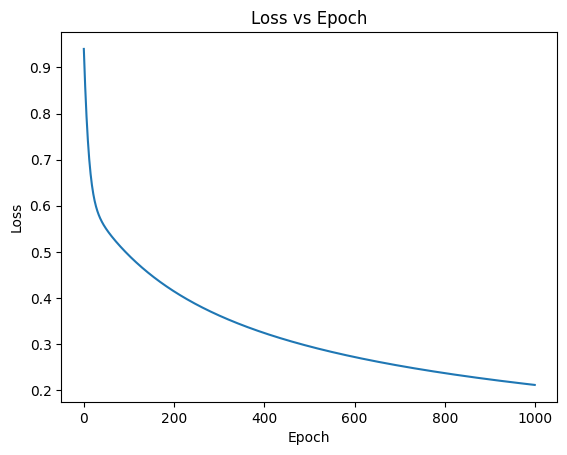

Layer 1
w = [[1.95906184]
 [1.95844037]
 [1.95657388]
 [1.95994524]]
b = [[-5.0273171]]


In [32]:
nn_majority_4_bce = SigmoidNN([4,1], x_4, x_4_majority_y, 0.1, 1000, loss_func="bce")
nn_majority_4_bce.train(print_epoch=10)
nn_majority_4_bce.plot_loss()
nn_majority_4_bce.print_weights_and_biases()

Epoch 0: Loss = 0.3735853294696504, Accuracy = 0.5
Epoch 10: Loss = 0.3601923173995235, Accuracy = 0.5
Epoch 20: Loss = 0.34503707183111515, Accuracy = 0.5
Epoch 30: Loss = 0.3282021168108705, Accuracy = 0.5
Epoch 40: Loss = 0.3100334879478158, Accuracy = 0.5
Epoch 50: Loss = 0.29121569079053866, Accuracy = 0.5
Epoch 60: Loss = 0.27274067755126463, Accuracy = 0.5
Epoch 70: Loss = 0.2557044672501031, Accuracy = 0.5
Epoch 80: Loss = 0.24097980904022942, Accuracy = 0.5
Epoch 90: Loss = 0.22895339800981127, Accuracy = 0.5625
Epoch 100: Loss = 0.21949779618408188, Accuracy = 0.59375
Epoch 110: Loss = 0.2121562811464626, Accuracy = 0.625
Epoch 120: Loss = 0.20637777211415304, Accuracy = 0.65625
Epoch 130: Loss = 0.2016745122625596, Accuracy = 0.6875
Epoch 140: Loss = 0.19768073510481077, Accuracy = 0.6875
Epoch 150: Loss = 0.19414878458118756, Accuracy = 0.6875
Epoch 160: Loss = 0.1909216385873116, Accuracy = 0.6875
Epoch 170: Loss = 0.18790385379484764, Accuracy = 0.71875
Epoch 180: Loss = 

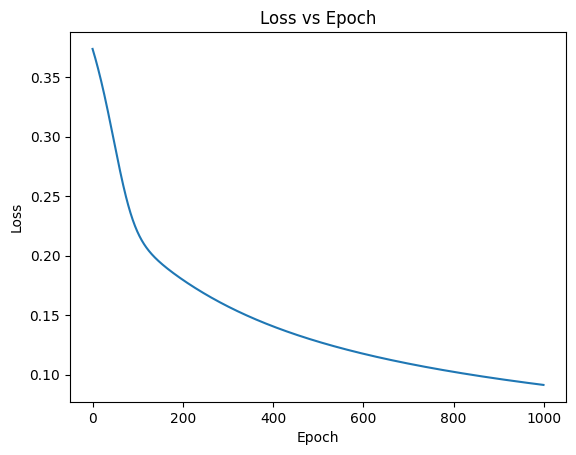

Layer 1
w = [[1.10405379]
 [1.11602963]
 [1.14081093]
 [1.12286393]
 [1.13951159]]
b = [[-2.66869962]]


In [33]:
nn_majority_5_mse = SigmoidNN([5,1], x_5, x_5_majority_y, 0.1, 1000, loss_func="mse")
nn_majority_5_mse.train(print_epoch=10)
nn_majority_5_mse.plot_loss()
nn_majority_5_mse.print_weights_and_biases()

Epoch 0: Loss = 0.9764695462727235, Accuracy = 0.5
Epoch 10: Loss = 0.7962065427370287, Accuracy = 0.5
Epoch 20: Loss = 0.6864984565334828, Accuracy = 0.5
Epoch 30: Loss = 0.6270930707262967, Accuracy = 0.5625
Epoch 40: Loss = 0.5947707718196393, Accuracy = 0.625
Epoch 50: Loss = 0.5746087964889592, Accuracy = 0.625
Epoch 60: Loss = 0.5595400071414703, Accuracy = 0.6875
Epoch 70: Loss = 0.5467092121718622, Accuracy = 0.78125
Epoch 80: Loss = 0.5350401001677902, Accuracy = 0.8125
Epoch 90: Loss = 0.5241278740854555, Accuracy = 0.8125
Epoch 100: Loss = 0.5138086954848281, Accuracy = 0.8125
Epoch 110: Loss = 0.5040040408975643, Accuracy = 0.8125
Epoch 120: Loss = 0.4946662966248479, Accuracy = 0.8125
Epoch 130: Loss = 0.48575996543156486, Accuracy = 0.8125
Epoch 140: Loss = 0.4772551395229715, Accuracy = 0.8125
Epoch 150: Loss = 0.46912516653344094, Accuracy = 0.84375
Epoch 160: Loss = 0.461345750615633, Accuracy = 0.84375
Epoch 170: Loss = 0.453894549730073, Accuracy = 0.875
Epoch 180: L

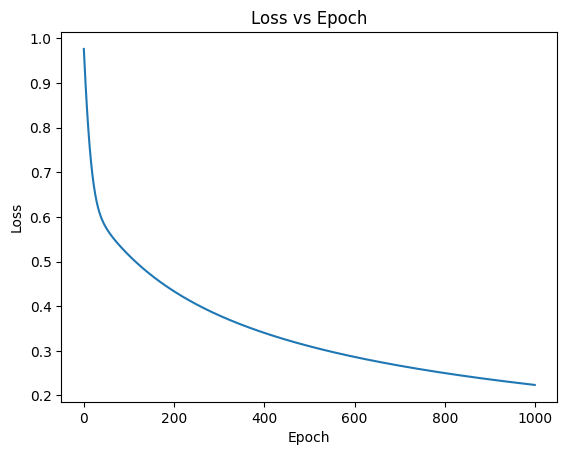

Layer 1
w = [[1.90680009]
 [1.91212555]
 [1.90960469]
 [1.91272638]
 [1.91306544]]
b = [[-4.59659874]]


In [34]:
nn_majority_5_bce = SigmoidNN([5,1], x_5, x_5_majority_y, 0.1, 1000, loss_func="bce")
nn_majority_5_bce.train(print_epoch=10)
nn_majority_5_bce.plot_loss()
nn_majority_5_bce.print_weights_and_biases()